# 1)Importing the required libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

# 2)Loading the datasets

In [2]:
# Loading the datasets
dataset = pd.read_csv('./heart.csv')

In [3]:
# Looking at data
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Variable Description**

#### **Age** : Age of the patient

#### **Sex** : Sex of the patient

#### **Exang** : exercise induced angina (1 = yes; 0 = no)

#### **Ca** : number of major vessels (0-3)

#### **Cp** : Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic

#### **trtbps** : resting blood pressure (in mm Hg)

#### **Chol** : cholestoral in mg/dl fetched via BMI sensor

#### **Fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### **Rest_ecg** : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### **Thalach** : maximum heart rate achieved

#### **Target** : 0= less chance of heart attack 1= more chance of heart attack

# 3)Exploratory Data Analysis

## >Univariate Analysis

<AxesSubplot:title={'center':'Age v/s Number of heart attacks'}, xlabel='AGE', ylabel='Frequency'>

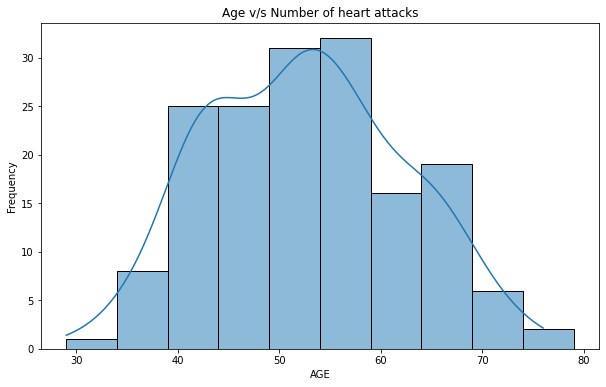

In [ ]:
fig = plt.figure(figsize=(10,6))
X = dataset['age']*dataset['output']
X= X[X != 0]
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title("Age v/s Number of heart attacks")
sns.histplot(data=X,binwidth=5,kde=True)
# We observe that people in the age of 40-60 got more heart attacks compared to others

<AxesSubplot:xlabel='age', ylabel='Count'>

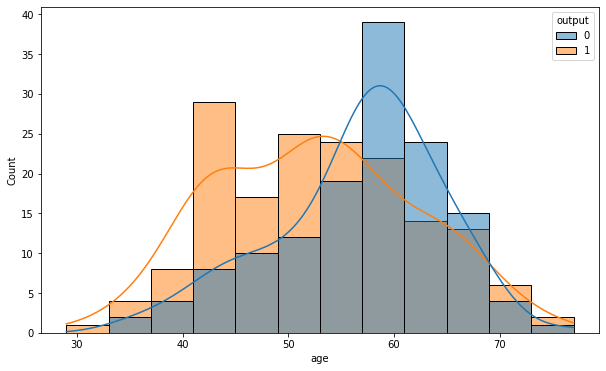

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=dataset, x="age", hue="output",kde=True)

<AxesSubplot:xlabel='sex', ylabel='Count'>

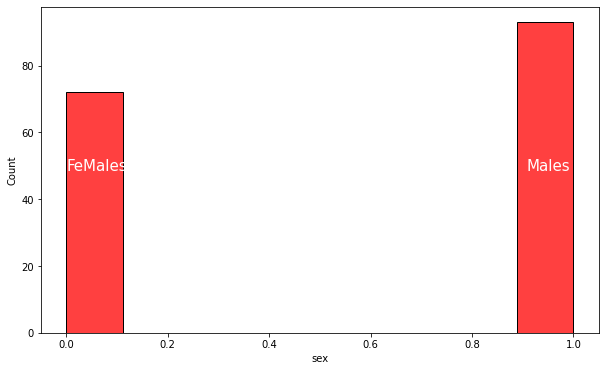

In [ ]:
X = dataset['sex']
X = X[dataset['output'] !=0]
fig = plt.figure(figsize=(10,6))
plt.figtext( .16,.5, "FeMales",color='white',fontsize=15)
plt.figtext(.8, .5, "Males",color='white',fontsize=15)
sns.histplot(data=X,color='r')

<AxesSubplot:title={'center':'Chest Pain type v/s # heart attacks'}, xlabel='Count', ylabel='Chest Pain Type'>

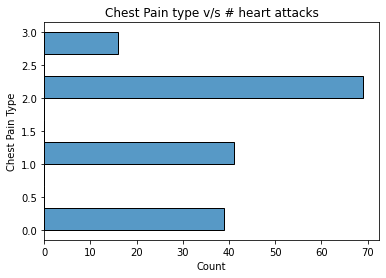

In [ ]:
X = dataset['cp']
X = X[dataset['output'] !=0]
plt.title("Chest Pain type v/s # heart attacks")
plt.ylabel("Chest Pain Type")
sns.histplot(y=X)
# We observe that people who got chest pain of type 3(value 2) are most likely to suffer heart attack

Text(0, 0.5, 'Count')

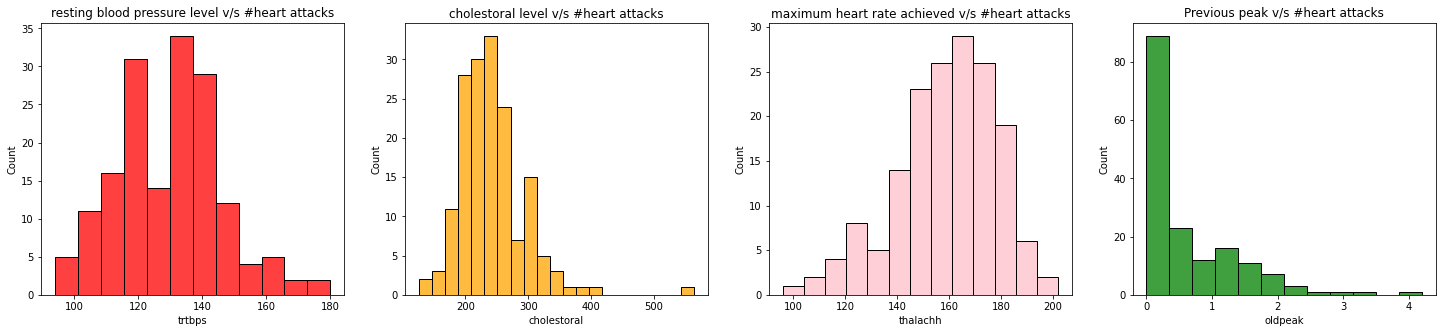

In [ ]:
# fig = plt.figure(figsize=(10,6))
fig, axs = plt.subplots(ncols=4,figsize=(25,5))
X = dataset['trtbps']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[0],color='r')
axs[0].set_title('resting blood pressure level v/s #heart attacks')
axs[0].set_xlabel('trtbps')
axs[0].set_ylabel('Count')
X = dataset['chol']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[1],color='orange')
axs[1].set_title('cholestoral level v/s #heart attacks')
axs[1].set_xlabel('cholestoral')
axs[1].set_ylabel('Count')
X = dataset['thalachh']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[2],color='pink')
axs[2].set_title('maximum heart rate achieved v/s #heart attacks')
axs[2].set_xlabel('thalachh')
axs[2].set_ylabel('Count')
X = dataset['oldpeak']
X = X[dataset['output'] !=0]
sns.histplot(x=X,ax=axs[3],color='green')
axs[3].set_title('Previous peak v/s #heart attacks')
axs[3].set_xlabel('oldpeak')
axs[3].set_ylabel('Count')

Text(0.5, 1.0, 'Thal rate')

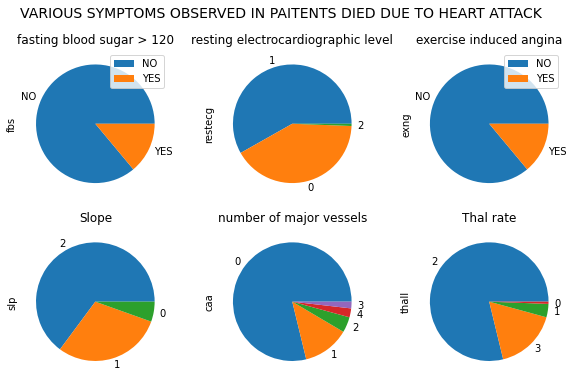

In [ ]:
plt.figure(figsize=(10,6))
plt.suptitle("VARIOUS SYMPTOMS OBSERVED IN PAITENTS DIED DUE TO HEART ATTACK ", fontsize=14)
plt.subplot(2, 3, 1)
X = dataset['fbs']
X = X[dataset['output'] !=0]
# grid(True)
X.value_counts().plot.pie(labels=['NO','YES'])
plt.title("fasting blood sugar > 120")
plt.legend()
# grid(True)

plt.subplot(2, 3, 2)
X = dataset['restecg']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("resting electrocardiographic level")

plt.subplot(2, 3, 3)
X = dataset['exng']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie(labels=['NO','YES'])
plt.title("exercise induced angina")
plt.legend()

plt.subplot(2, 3, 4)
X = dataset['slp']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("Slope")


plt.subplot(2, 3, 5)
X = dataset['caa']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("number of major vessels")

plt.subplot(2, 3, 6)
X = dataset['thall']
X = X[dataset['output'] !=0]
X.value_counts().plot.pie()
plt.title("Thal rate")


## Multivariate Analysis

In [ ]:
df = dataset.loc[:,['age','trtbps','chol','thalachh','oldpeak','output']]

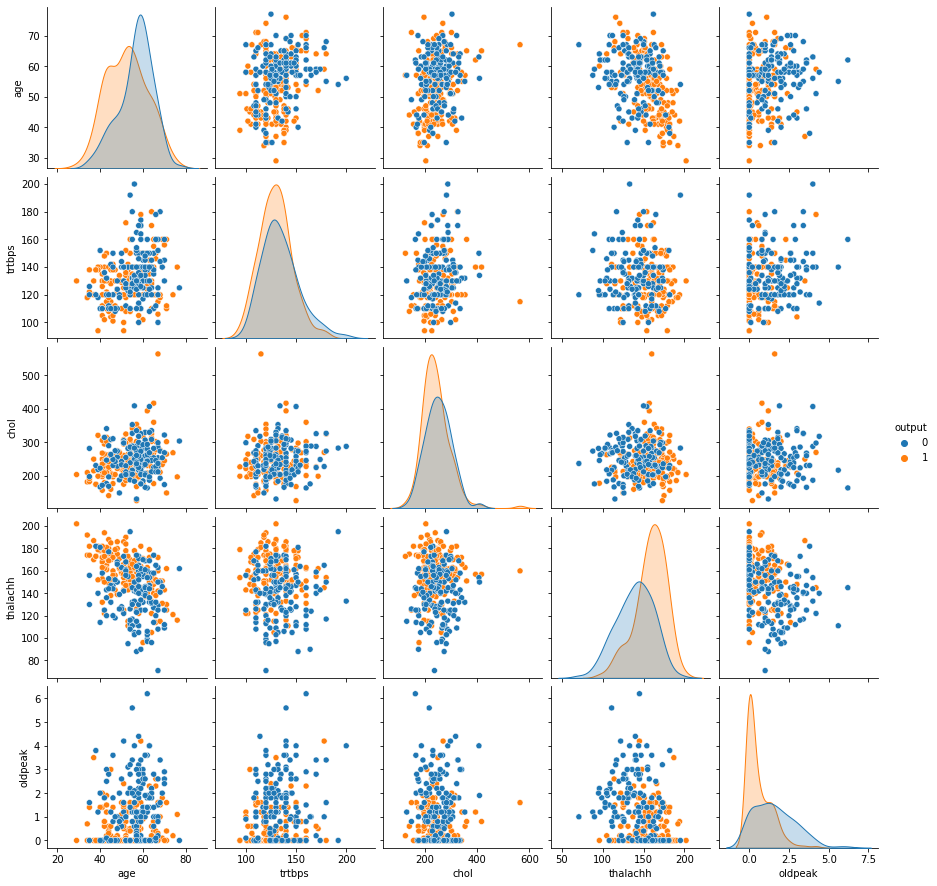

In [ ]:
sns.pairplot(df,hue='output')

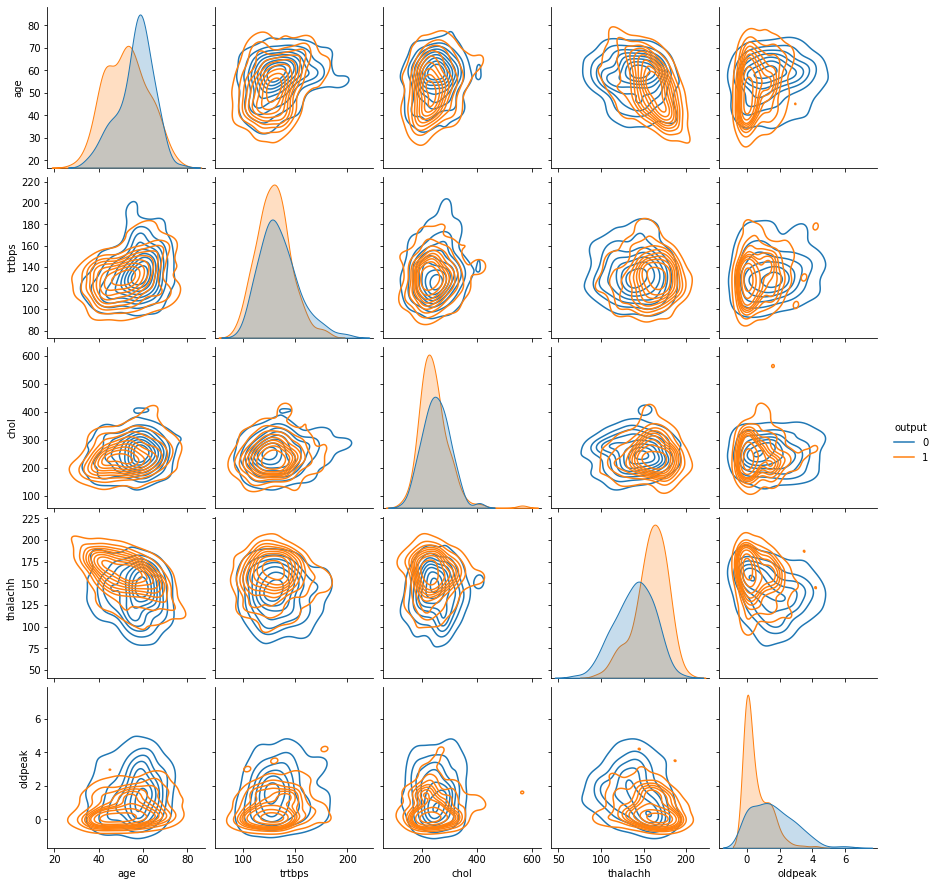

In [ ]:
sns.pairplot(df,hue='output',kind='kde')

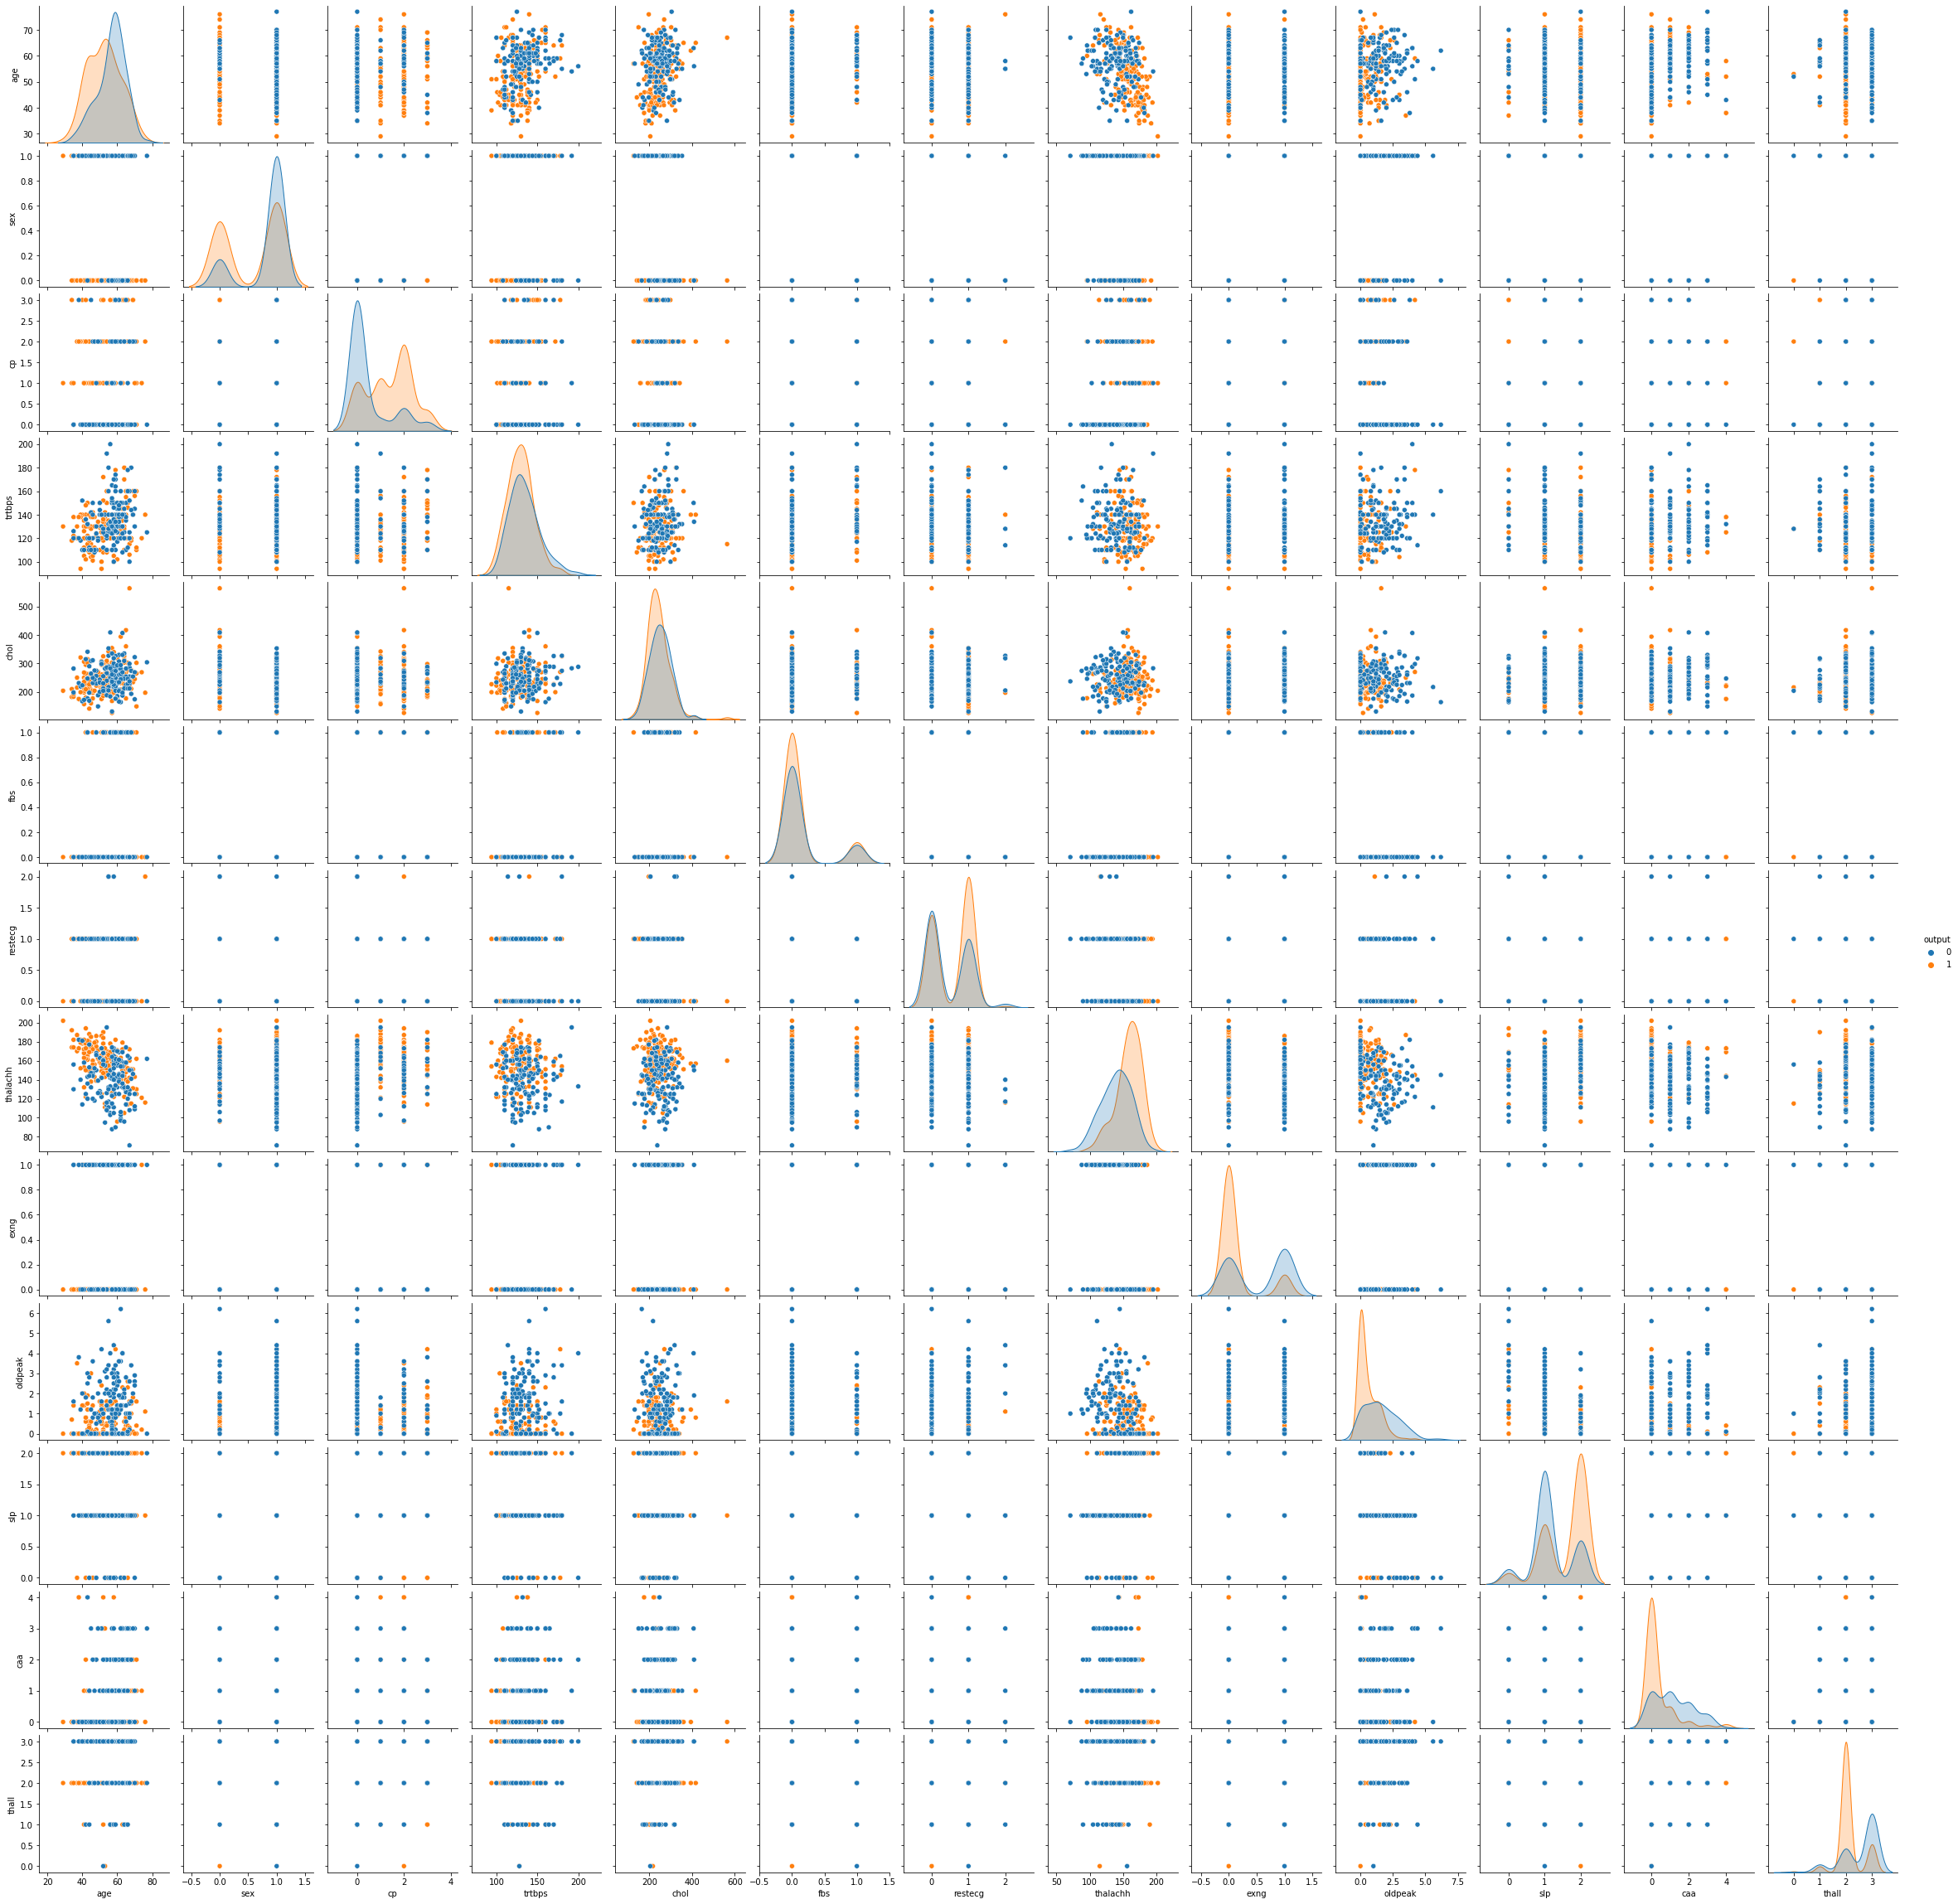

In [ ]:
sns.pairplot(dataset,hue='output')

<AxesSubplot:>

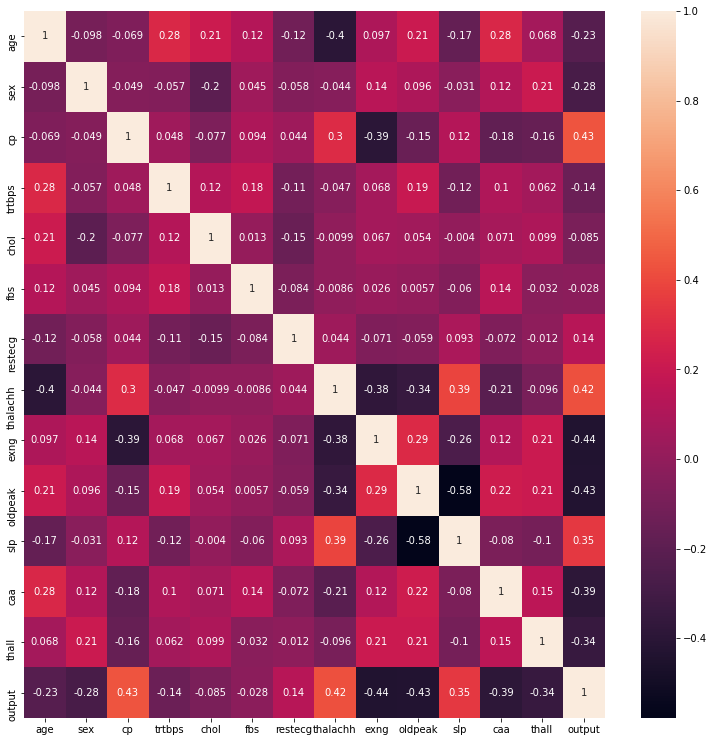

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(dataset.corr(),color='red',annot=True)

#### Observations

1)Following symptoms are more likely to appear in paitents who suffered with heart attack

*  Chestpain type 3(Non anginal chest pains)
*  number of major vessels 0
*  Higher Thall rate
*  People with exercise induced angina
*  People with higher old peak value

2)Correlations

*   OldPeak and slp show strongly negetive Correlation 
*   Slp,thalachh,cp show strongly positive Correltion

# 4)Preprocessing Data

## Handling the missing data

In [13]:
missing_values_count = dataset.isnull().sum()
missing_values_count[0:]
# No missing values observed

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## One hot encoding,Scaling and Splitting the data

In [14]:
# cp,restecg,exng,slp,caa,thall
#age,trtbps,chol,thalachh,oldpeak

In [15]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Multiple categorical columns
categorical_cols = ['cp','restecg','exng','slp','caa','thall']
df =pd.get_dummies(dataset, columns=categorical_cols)
df

,age,sex,trtbps,chol,fbs,thalachh,oldpeak,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exng_0,exng_1,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,2.3,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,3.5,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,1.4,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0.8,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,0.6,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,0.2,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,1.2,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,3.4,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1.2,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [17]:
X = df.drop('output',axis=1)
y = df['output']

In [18]:
# Train and Test Splitting of data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train[['age','trtbps','chol','thalachh','oldpeak']] = scaler.fit_transform(X_train[['age','trtbps','chol','thalachh','oldpeak']].values)
X_test[['age','trtbps','chol','thalachh','oldpeak']] = scaler.transform(X_test[['age','trtbps','chol','thalachh','oldpeak']])

# 5)Performing machine learning algorithms on our data

## a)Logistic Regression
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>86.78%</td>
    <td>90.16%</td>
    <td>86.00%</td>
    <td>5.27%</td>
    <td>0.90</td>
    <td>0.91%</td>
  </tr>
</table>


**Model**

In [ ]:
lr_clf = LogisticRegression(random_state = 0,max_iter=1000)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,lr_clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print(lr_clf.get_params)

Train Accuracy : 87.60%
Test Accuracy  : 88.52%
<bound method BaseEstimator.get_params of LogisticRegression(max_iter=1000, random_state=0)>


**Exaustive Grid Search**

In [ ]:
param = [
  {'solver': ['newton-cg', 'lbfgs', 'liblinear','saga'],
   'penalty':['l2','l1','elasticnet'],
    'C':[ 100,10, 1.0, 0.1, 0.01,0.0001],
   'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
   },
 ]
grid_clf = GridSearchCV(lr_clf, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

**Training the model with best params**

In [ ]:
clf = LogisticRegression(C = 1.0 ,solver='saga',penalty='elasticnet',l1_ratio=0.2,max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# False negetives = False positives

[[26  3]
 [ 3 29]]


0.9016393442622951

**Train/Test Accuracy**

In [ ]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 86.78%
Test Accuracy  : 90.16%


**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**K-fold Cross Validation**

In [ ]:
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.95 %
Standard Deviation: 5.27 %


## b)K-NN
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>88.43%</td>
    <td>90.16%</td>
    <td>84.00%</td>
    <td>6.48%</td>
    <td>0.89</td>
    <td>0.91%</td>
  </tr>
</table>

**Model**

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

**Exaustive Grid Search**

In [22]:
param = [
  {
      'n_neighbors':[1,3,5,7,9,11,13,15],
      'weights':['uniform', 'distance'],
      'metric' : ['euclidean','manhattan','minkowski'], 
      'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
      'p':[1,2],
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [23]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='manhattan' ,weights = 'uniform', p = 1,algorithm= 'auto')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Accuracy**

In [24]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 88.84%
Test Accuracy  : 90.16%


**Confusion Matrix**

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# False negetive < False positives

[[25  4]
 [ 2 30]]


0.9016393442622951

**Classification Report**

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**K fold Cross Validation**

In [27]:
# K-fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.90 %
Standard Deviation: 6.48 %


## c)SVM
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>93.80%</td>
    <td>90.16%</td>
    <td>80.15%</td>
    <td>5.43%</td>
    <td>0.90</td>
    <td>0.91%</td>
  </tr>
</table>


**Model**

In [28]:
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)>

**Exaustive Grid Search**

In [34]:
param = [
  {
      'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
       'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
       'gamma' :[1, 0.1, 0.01, 0.001, 0.0001,'scale','auto']
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

**Training the model with best params**

In [35]:
classifier = SVC(kernel='rbf',gamma='scale',C=1.445,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[26  3]
 [ 3 29]]


0.9016393442622951

In [37]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 93.39%
Test Accuracy  : 90.16%


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [39]:
# K-fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.03 %
Standard Deviation: 4.35 %


## d)Decision Tree
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>89.67%</td>
    <td>85.25%</td>
    <td>83.47%</td>
    <td>5.88%</td>
    <td>0.85</td>
    <td>0.86%</td>
  </tr>
</table>


**Model**

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>

**Grid Search CV**

In [42]:
param = [
  {
      'criterion':['gini', 'entropy'], 
      'splitter':['best', 'random'],
      'max_depth':[3,None],
      'max_features':[1,2,3,4,5,6,7,8,9,'auto','sqrt','log2',None],
      'min_samples_leaf': [1,2,3,4,5,6,7,8,9],
   },
 ]
grid_clf = GridSearchCV(classifier, param_grid=param, scoring='accuracy', cv=10)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 3,
 'splitter': 'best'}

**Fitting the model**

In [43]:
classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=10,max_features=5,min_samples_leaf=3,splitter='best', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [44]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 89.67%
Test Accuracy  : 85.25%


**Confusion Matrix**

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  4]
 [ 5 27]]


**Classification Report**

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



**K-fold Cross Validation**

In [47]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.47 %
Standard Deviation: 5.88 %


## e)Random Forest
<hr>
<table>
  <tr>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
  </tr>
  <tr>
    <td>92.15%</td>
    <td>88.52%</td>
    <td>81.00%</td>
    <td>2.45</td>
    <td>0.88</td>
    <td>0.89%</td>
  </tr>
</table>


**Model**

In [48]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,bootstrap=False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)>

**Random Hyperparameter Grid**

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

**Random Search Training**

In [50]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3,
                               verbose=2, random_state=42,
                               n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.fit(X_train,y_train)

In [ ]:
classifier = RandomForestClassifier(bootstrap=True,max_depth=10,n_estimators = 400, criterion = 'entropy', random_state = 0,max_features='sqrt',min_samples_leaf=4,min_samples_split=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Train,Test Accuracy**

In [ ]:
print("Train Accuracy : {:.2f}%".format(accuracy_score(y_train,classifier.predict(X_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Train Accuracy : 92.15%
Test Accuracy  : 88.52%


**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  4]
 [ 3 29]]


0.8852459016393442

**Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**K Fold Cross Validation**

In [ ]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.59 %
Standard Deviation: 2.45 %


# Results And Observations

##Results
<table>
<tr>
    <th>MODEL</th>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
    <th>Mean(10-fold CV score)</th>
    <th>Standard Deviation(10-fold CV Score)</th>
    <th>F1 Score 0</th>
     <th>F1 Score 1</th>
</tr>

<tr>
     <th scope="row">Logistic Regression</th>
    <td>86.78%</td>
    <td>90.16%</td>
    <td>86.00%</td>
    <td>5.27%</td>
    <td>0.90</td>
    <td>0.91</td>
</tr>

<tr>
    <th scope="row" > KNN </th>
    <td>89.67%</td>
    <td>85.25%</td>
    <td>83.47%</td>
    <td>5.88%</td>
    <td>0.85</td>
    <td>0.86</td>
</tr>

<tr>
    <th scope="row" > SVM </th>
    <td>93.80%</td>
    <td>90.16%</td>
    <td>80.15%</td>
    <td>5.43%</td>
    <td>0.90</td>
    <td>0.91</td>
</tr>
<tr>
    <th scope="row" > Decision Tree </th>
    <td>93.80%</td>
    <td>90.16%</td>
    <td>80.15%</td>
    <td>5.43%</td>
    <td>0.90</td>
    <td>0.91</td>
</tr>

<tr>
    <th scope="row" > Random Forest</th>
    <td>92.15%</td>
    <td>88.52%</td>
    <td>81.00%</td>
    <td>2.45</td>
    <td>0.88</td>
    <td>0.89</td>
</tr>

</table>
